In [1]:
# Import useful python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf

## June 1st - zerod at like 29.3 C, added CO2, immediatly jumped
- Then filled cell, had to really tighten sensor up, then sealed tank at 11.44 ish (11am ish), then got perfect increase in prssure and tempreaure as sensor heated up again towards 35. 

In [17]:
P2=pf.calculate_rho_for_P_T(P_kbar=11.53/100, T_K=37+273.15)
P2

0    0.736759
dtype: float64

In [16]:
P2=pf.calculate_rho_for_P_T(P_kbar=11.5352/100, T_K=37+273.15)
P2

0    0.736896
dtype: float64

## Allowed variation is 1.5% of full eror from -20 to +70

In [12]:
per_ce=1.5/(90)
per_ce

0.016666666666666666

In [14]:
bar=(100*per_ce/100)*1
MPa=bar/10
MPa

0.0016666666666666666

In [2]:
df=pd.read_excel('Experiment_37C_4-10-23.xlsx')

In [3]:
a=pf.calculate_rho_for_P_T(P_kbar=df['PAV']/100,
                         T_K=df['T_AV']+273.15,
                         EOS='SW96')
a                       

0      1.034183
1      1.034131
2      1.034106
3      1.026058
4      1.025981
         ...   
156    0.015331
157    0.015387
158    0.005157
159    0.005104
160    0.005108
Length: 161, dtype: float64

In [4]:
a.to_clipboard(excel=True)

In [5]:
df2=pd.read_excel('Experiment_37C_4-10-23.xlsx', sheet_name='Sheet2')

In [6]:
cd=pf.calculate_density_cornell(temp='SupCrit', Split=df2['Corrected_Splitting'])

In [7]:
cd_noNe=pf.calculate_density_cornell(temp='SupCrit', Split=df2['Splitting'])

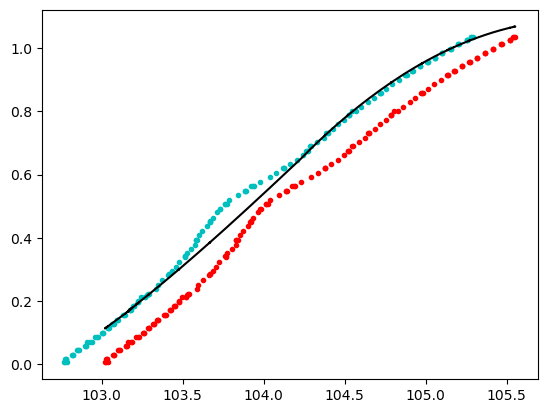

In [8]:
plt.plot(df2['Splitting'], df2['Density'],  '.r')
plt.plot(df2['Corrected_Splitting'], df2['Density'],  '.c')
plt.plot(df2['Splitting'],cd_noNe['Preferred D'],'-k')

In [12]:
a=df2['Diad2_Combofit_Height']/df2['Diad1_Combofit_Height']
a.to_clipboard(excel=True)

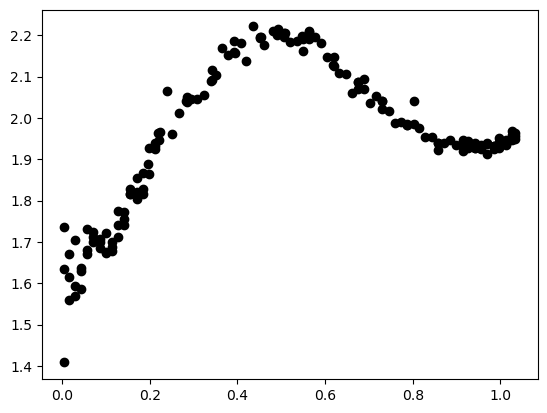

In [9]:
plt.plot(df2['Density'],
    df2['Diad2_Combofit_Height']/df2['Diad1_Combofit_Height'], 'ok')

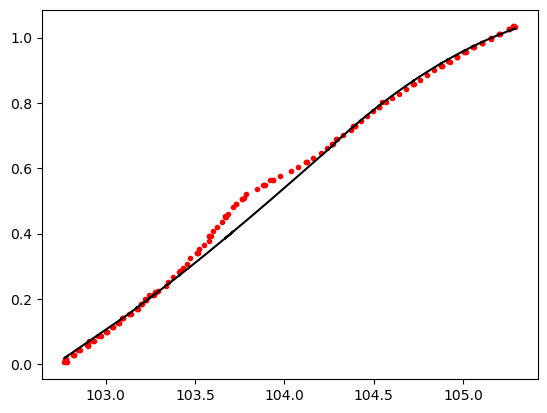

In [9]:
plt.plot(df2['Corrected_Splitting'], df2['Density'],  '.r')
plt.plot(df2['Corrected_Splitting'],cd['Preferred D'],'-k')


In [10]:
micro=np.array([0.959,
0.9589,
0.9595,
0.9606,
0.96,
0.9551,
0.9671,
0.9654,
0.9719])

Diff=np.array([0.0306,
0.0352,
0.0227,
0.0321,
0.0316,
0.0399,
0.0385,
0.0493,
0.0318])


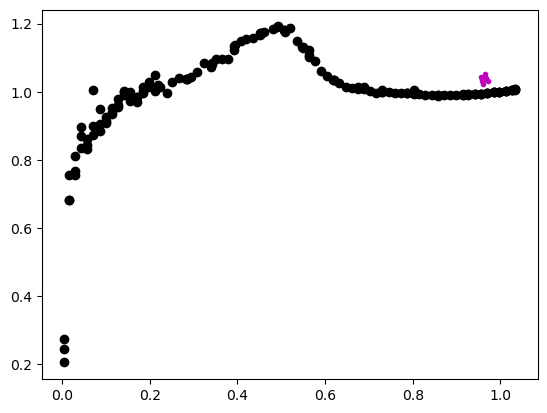

In [11]:
plt.plot(df2['Density'], df2['Density']/cd['Preferred D'], 'ok', label='Berkeley PT - Cornell Raman')
plt.plot(micro, (Diff+micro)/micro, '.m', label='Microthermometry - Cornell Raman')

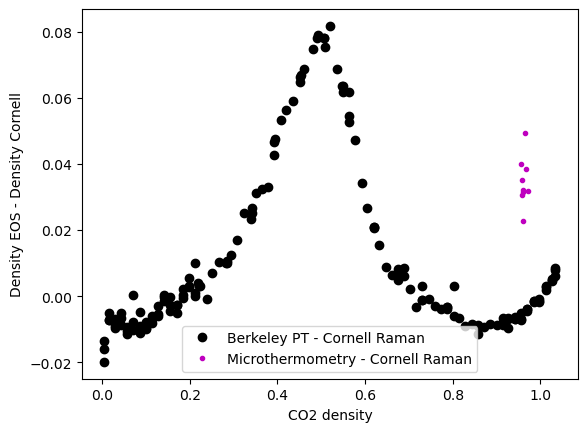

In [12]:
plt.plot(df2['Density'], df2['Density']-cd['Preferred D'], 'ok', label='Berkeley PT - Cornell Raman')
plt.plot(micro, Diff, '.m', label='Microthermometry - Cornell Raman')
plt.xlabel('CO2 density')
plt.ylabel('Density EOS - Density Cornell')
plt.legend()

Text(0.5, 0, 'Gas Cell UCB (g/cm3)')

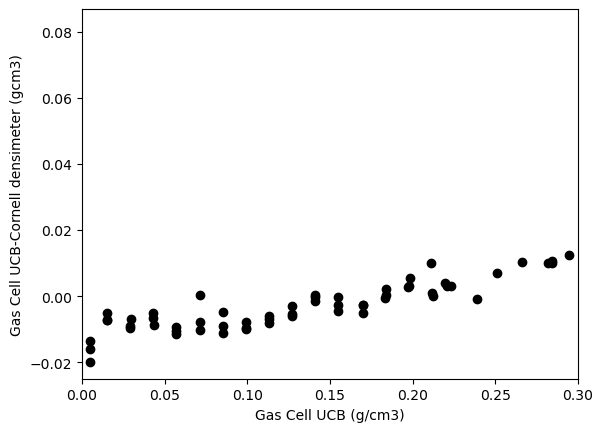

In [17]:
plt.plot(df2['Density'], df2['Density']-cd['Preferred D'], 'ok', label='Berkeley PT - Cornell Raman')
plt.xlim([0, 0.3])
plt.ylabel('Gas Cell UCB-Cornell densimeter (gcm3)')
plt.xlabel('Gas Cell UCB (g/cm3)')

Text(0.5, 0, 'Gas Cell UCB (g/cm3)')

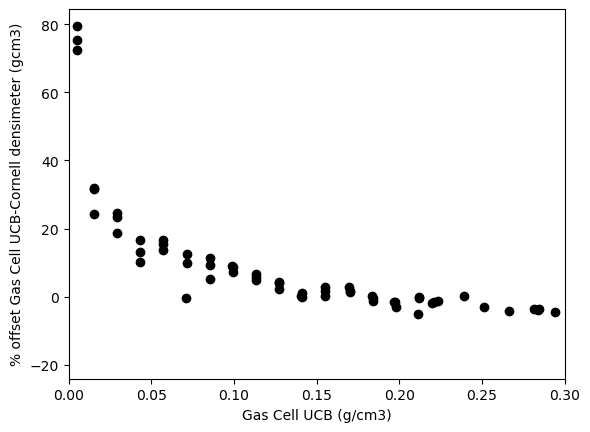

In [21]:
plt.plot(df2['Density'], 100-100*df2['Density']/cd['Preferred D'], 'ok', label='Berkeley PT - Cornell Raman')
plt.xlim([0, 0.3])
plt.ylabel('% offset Gas Cell UCB-Cornell densimeter (gcm3)')
plt.xlabel('Gas Cell UCB (g/cm3)')

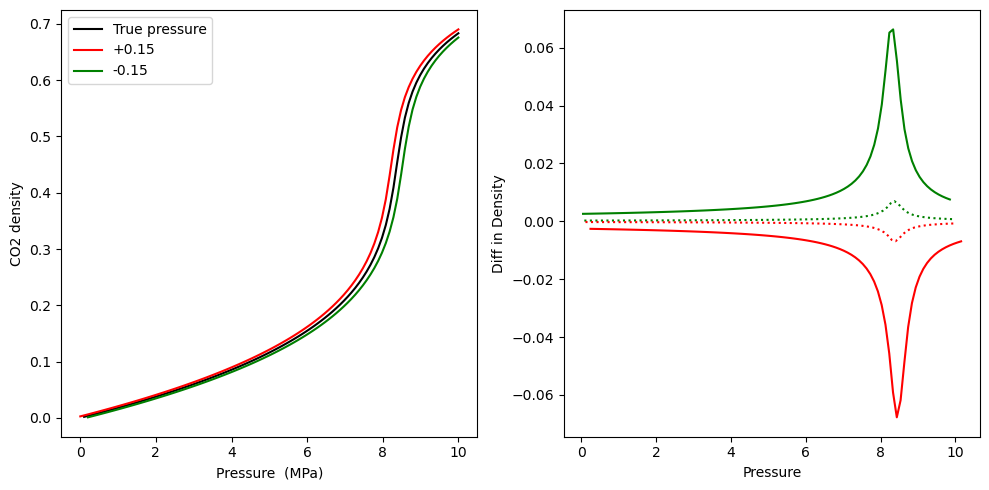

In [67]:
PM=np.linspace(0, 10, 100)
P=pf.calculate_rho_for_P_T(P_kbar=PM/100, T_K=37+273.15)

      
PM2=PM+0.15
P2=pf.calculate_rho_for_P_T(P_kbar=PM2/100, T_K=37+273.15)

PM2s=PM+0.015
P2s=pf.calculate_rho_for_P_T(P_kbar=PM2s/100, T_K=37+273.15)

PM3=PM-0.15
P3=pf.calculate_rho_for_P_T(P_kbar=PM3/100, T_K=37+273.15)

PM3s=PM-0.015
P3s=pf.calculate_rho_for_P_T(P_kbar=PM3s/100, T_K=37+273.15)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.plot(PM, P, '-k', label='True pressure')
ax1.plot(PM, P2, '-r', label='+0.15')
ax1.plot(PM, P3, '-g', label='-0.15')
ax1.set_xlabel('Pressure  (MPa)')
ax1.set_ylabel('CO2 density')
ax1.legend()
ax2.plot(PM2, P-P2, '-r')
ax2.plot(PM3, P-P3, '-g')
ax2.plot(PM3s, P-P3s, ':g')
ax2.plot(PM2s, P-P2s, ':r')
ax2.set_xlabel('Pressure')
ax2.set_ylabel('Diff in Density')
#ax2.plot(df2['Density'], df2['Density']-cd['Preferred D'], 'ok', label='Berkeley PT - Cornell Raman')

fig.tight_layout()

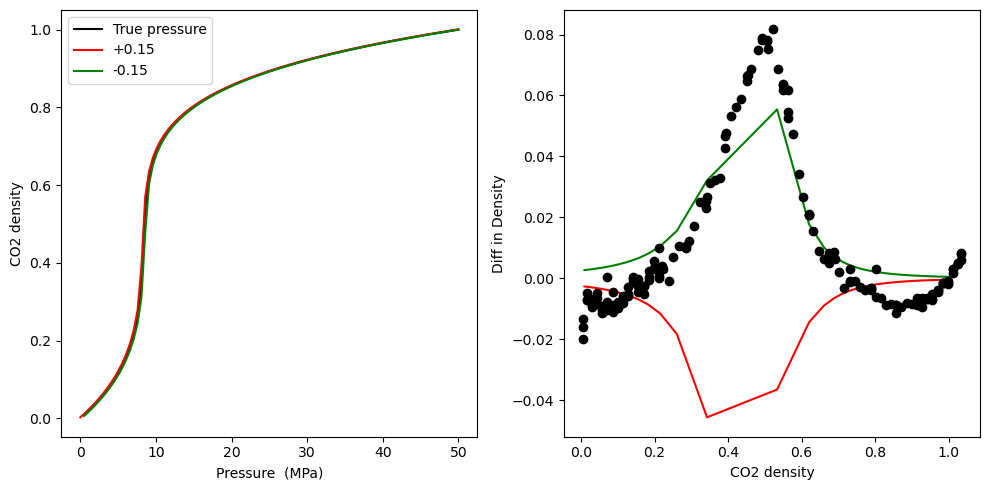

In [14]:
PM=np.linspace(0, 50, 100)
P=pf.calculate_rho_for_P_T(P_kbar=PM/100, T_K=37+273.15)

      
PM2=PM+0.15
P2=pf.calculate_rho_for_P_T(P_kbar=PM2/100, T_K=37+273.15)

PM3=PM-0.15
P3=pf.calculate_rho_for_P_T(P_kbar=PM3/100, T_K=37+273.15)



fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.plot(PM, P, '-k', label='True pressure')
ax1.plot(PM, P2, '-r', label='+0.15')
ax1.plot(PM, P3, '-g', label='-0.15')
ax1.set_xlabel('Pressure  (MPa)')
ax1.set_ylabel('CO2 density')
ax1.legend()
ax2.plot(P, P-P2, '-r')
ax2.plot(P, P-P3, '-g')
ax2.set_xlabel('CO2 density')
ax2.set_ylabel('Diff in Density')
ax2.plot(df2['Density'], df2['Density']-cd['Preferred D'], 'ok', label='Berkeley PT - Cornell Raman')

fig.tight_layout()

In [28]:
Pi

0    0.683403
dtype: float64

In [55]:

PMi=np.linspace(5, 15, 100)
Pi=pf.calculate_rho_for_P_T(P_kbar=PMi/100, T_K=37+273.15)

PM2i=PMi+0.15
P2i=pf.calculate_rho_for_P_T(P_kbar=PM2i/100, T_K=37+273.15)

PM3i=PMi-0.15
P3i=pf.calculate_rho_for_P_T(P_kbar=PM3i/100, T_K=37+273.15)


Pi_entrap_1200C=pf.calculate_P_for_rho_T(CO2_dens_gcm3=Pi, T_K=1200+273.15)
Pi2_entrap_1200C=pf.calculate_P_for_rho_T(CO2_dens_gcm3=P2i, T_K=1200+273.15)
Pi3_entrap_1200C=pf.calculate_P_for_rho_T(CO2_dens_gcm3=P3i, T_K=1200+273.15)


Pi_entrap_1300C=pf.calculate_P_for_rho_T(CO2_dens_gcm3=Pi, T_K=1300+273.15)
Pi2_entrap_1300C=pf.calculate_P_for_rho_T(CO2_dens_gcm3=P2i, T_K=1300+273.15)
Pi3_entrap_1300C=pf.calculate_P_for_rho_T(CO2_dens_gcm3=P3i, T_K=1300+273.15)

Pi_entrap_1050C=pf.calculate_P_for_rho_T(CO2_dens_gcm3=Pi, T_K=1050+273.15)
Pi2_entrap_1050C=pf.calculate_P_for_rho_T(CO2_dens_gcm3=P2i, T_K=1050+273.15)
Pi3_entrap_1050C=pf.calculate_P_for_rho_T(CO2_dens_gcm3=P3i, T_K=1050+273.15)

In [53]:
Pi_entrap

,P_kbar,P_MPa,T_K,CO2_dens_gcm3
0,0.349690,34.969036,1473.15,0.115976
1,0.361053,36.105311,1473.15,0.119439
2,0.372756,37.275570,1473.15,0.122986
3,0.384820,38.482025,1473.15,0.126623
4,0.397271,39.727117,1473.15,0.130356
...,...,...,...,...
95,5.085466,508.546596,1473.15,0.795752
96,5.104979,510.497940,1473.15,0.797220
97,5.124288,512.428790,1473.15,0.798668
98,5.143397,514.339703,1473.15,0.800097


Text(0, 0.5, 'Abs in P kbar')

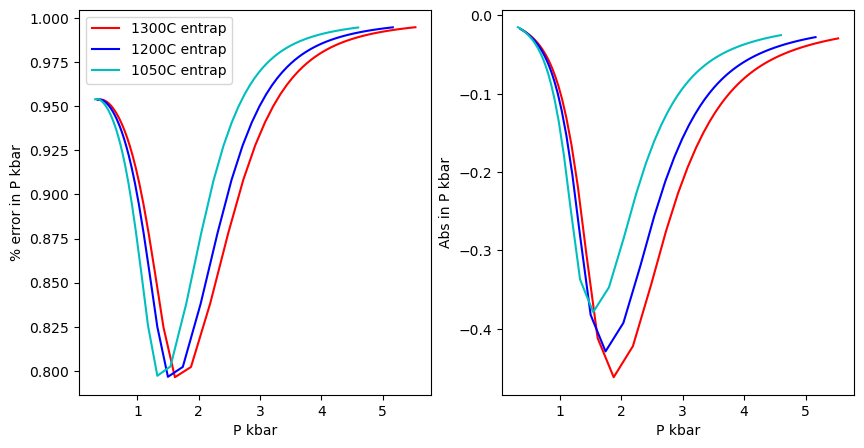

In [68]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(Pi_entrap_1300C['P_kbar'], Pi_entrap_1300C['P_kbar']/Pi2_entrap_1300C['P_kbar'],'-r', label='1300C entrap')
ax1.plot(Pi_entrap_1200C['P_kbar'], Pi_entrap_1200C['P_kbar']/Pi2_entrap_1200C['P_kbar'],'-b', label='1200C entrap')
ax1.plot(Pi_entrap_1050C['P_kbar'], Pi_entrap_1050C['P_kbar']/Pi2_entrap_1050C['P_kbar'],'-c', label='1050C entrap')
ax1.legend()
ax1.set_xlabel('P kbar')
ax1.set_ylabel('% error in P kbar')
ax2.plot(Pi_entrap_1300C['P_kbar'], Pi_entrap_1300C['P_kbar']-Pi2_entrap_1300C['P_kbar'],'-r')
ax2.plot(Pi_entrap_1200C['P_kbar'], Pi_entrap_1200C['P_kbar']-Pi2_entrap_1200C['P_kbar'],'-b')
ax2.plot(Pi_entrap_1050C['P_kbar'], Pi_entrap_1050C['P_kbar']-Pi2_entrap_1050C['P_kbar'],'-c')
ax2.set_xlabel('P kbar')
ax2.set_ylabel('Abs in P kbar')

Text(0.5, 0, 'Entrapment pressure in kbar')

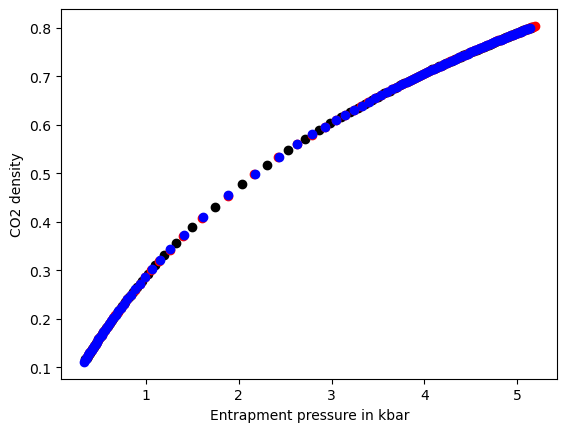

In [43]:
plt.plot(Pi_entrap['P_kbar'], Pi, 'ok', label='True sensor')
plt.plot(Pi2_entrap['P_kbar'], P2i, 'or', label='Sensor +0.15')
plt.plot(Pi3_entrap['P_kbar'], P3i, 'ob', label='Sensor -0.15')
plt.ylabel('CO2 density')
plt.xlabel('Entrapment pressure in kbar')

## Its sensor temp isnt it

In [14]:
PT=pd.read_excel('Experiment_37C_4-10-23.xlsx', sheet_name='Sensor_T_andP')
PT=PT.iloc[600:]

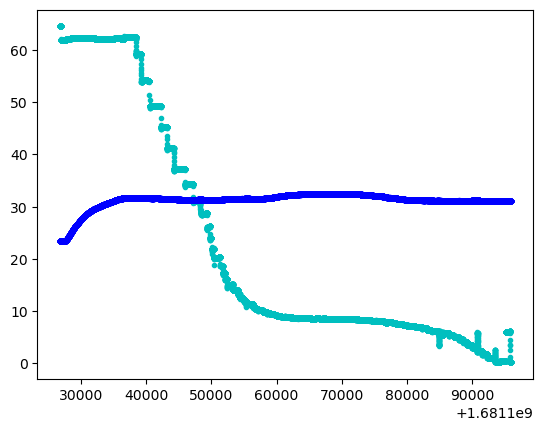

In [15]:
plt.plot(PT['unix_timestamp'],
         PT['Pressure / MPa'], '.c')
plt.plot(PT['unix_timestamp'],
         PT['Temperature / °C'], '.b')

Text(0, 0.5, 'Sensor T')

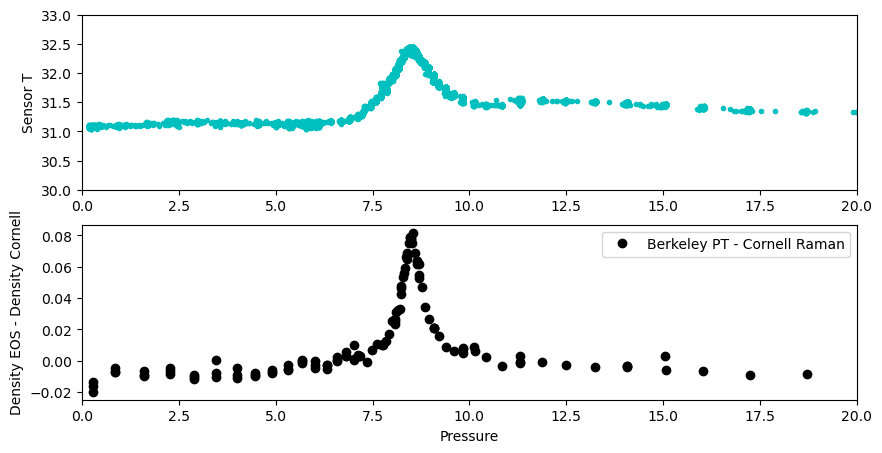

In [16]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,5))
ax1.plot(
    PT['Pressure / MPa'],
    PT['Temperature / °C'],'.c')     


ax2.plot(df2['PAV'], df2['Density']-cd['Preferred D'], 'ok', label='Berkeley PT - Cornell Raman')
plt.xlabel('Pressure')
plt.ylabel('Density EOS - Density Cornell')
plt.legend()
ax1.set_xlim([0, 20])
ax2.set_xlim([0, 20])
ax1.set_ylim([30, 33])
ax1.set_ylabel('Sensor T')

## Charlottes calibration

In [75]:
cornell_PT=pd.read_excel(r'G:\My Drive\Berkeley_NEW\DiadFit_outer\docs\Examples\Example6_esitec_pressure_calibration\PRESSURE SENSOR OUT 08272021_trimmed.xlsx')
cornell_PT=cornell_PT.loc[cornell_PT['Pressure / MPa'].between(0, 15)].reset_index(drop=True)
print(len(cornell_PT))
cornell_PT=cornell_PT.iloc[2000:12000, :]

17075


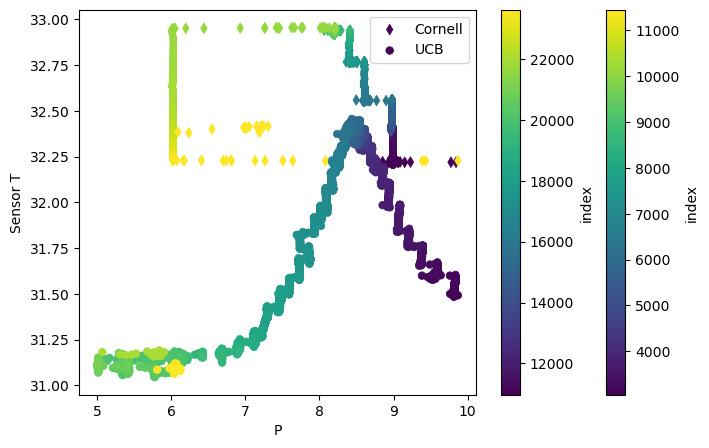

In [95]:
index510=(cornell_PT['Pressure / MPa'].between(6, 10))
fig, (ax1) = plt.subplots(1, 1, figsize = (8,5))

s=ax1.scatter(
    cornell_PT['Pressure / MPa'].loc[index510],
    cornell_PT['Temperature / °C'].loc[index510],
marker='d', s=30,  linewidths=0.5,
            c=cornell_PT.index[index510], cmap='viridis', label='Cornell')
fig.colorbar(s, ax=ax1, label='index')

filt_index=PT['Pressure / MPa'].between(5, 10)
s=ax1.scatter(
    PT['Pressure / MPa'].loc[filt_index],
    PT['Temperature / °C'].loc[filt_index],
marker='o', s=30,  linewidths=0.5,
            c=PT.index[filt_index], cmap='viridis', label='UCB')


fig.colorbar(s, ax=ax1, label='index')
ax1.set_ylabel('Sensor T')
ax1.set_xlabel('P')
ax1.legend()

Text(0.5, 0, 'P')

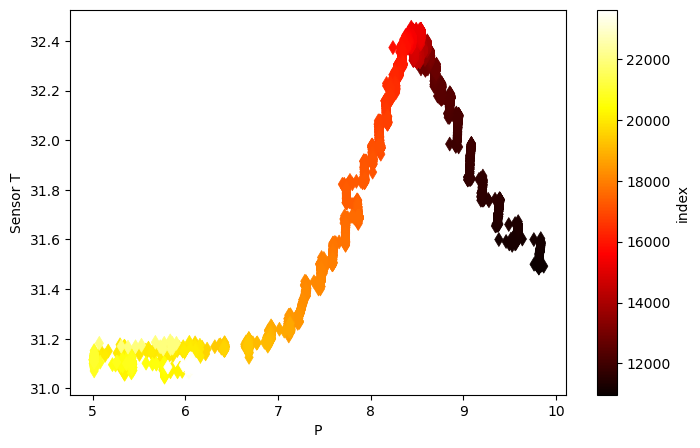

In [86]:
fig, (ax1) = plt.subplots(1, 1, figsize = (8,5))

ax1.set_ylabel('Sensor T')
ax1.set_xlabel('P')

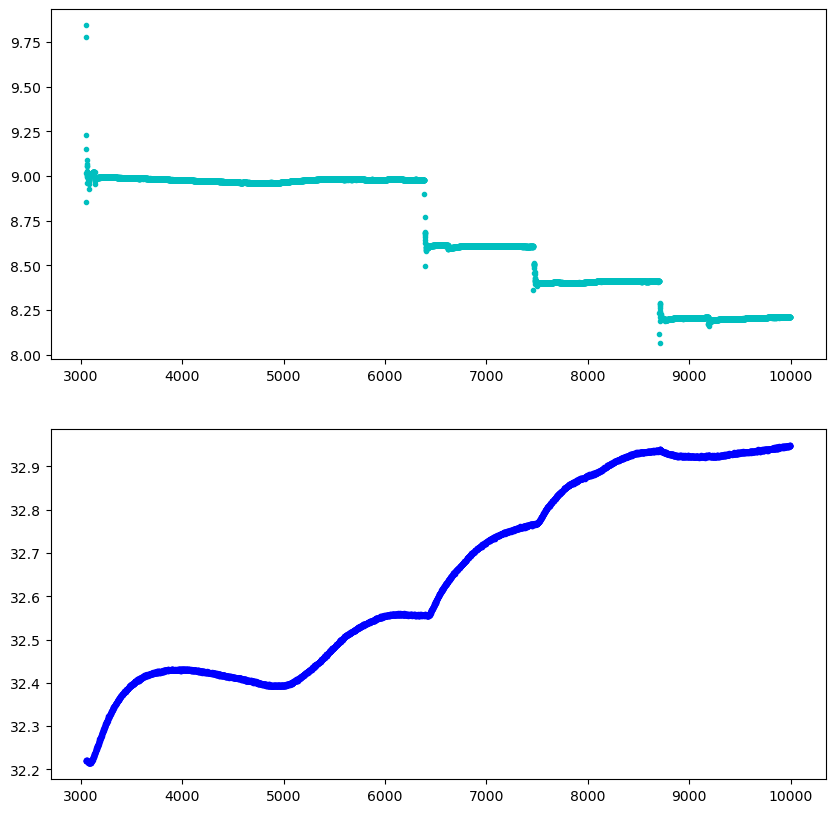

In [72]:

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,10))
ax1.plot(cornell_PT.index[index510],
    cornell_PT['Pressure / MPa'].loc[index510],
    
    '.c')  
ax2.plot(cornell_PT.index[index510],
    cornell_PT['Temperature / °C'].loc[index510],
    
    '.b')

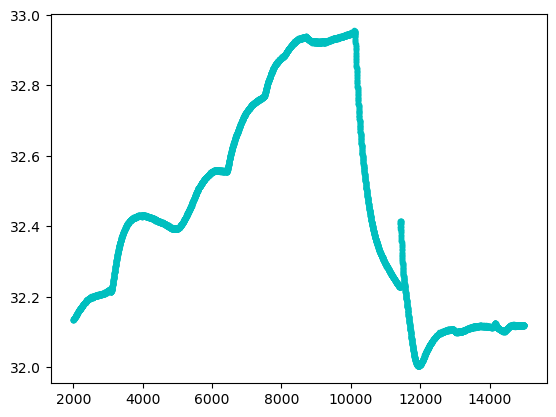

In [50]:
plt.plot(cornell_PT.index,
    cornell_PT['Temperature / °C'],
    
    '.c')  

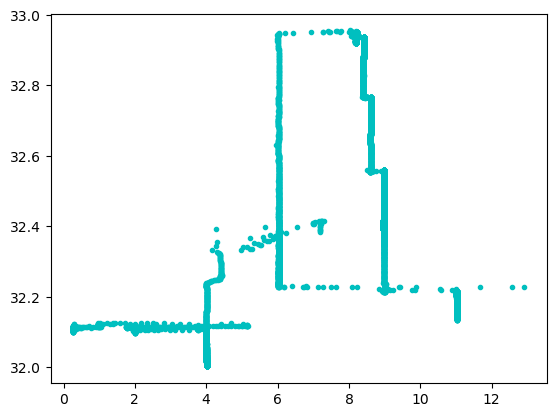

In [55]:
plt.plot(
    cornell_PT['Pressure / MPa'],
    cornell_PT['Temperature / °C'],'.c')  

In [17]:
aranet=pd.read_excel(r'../Aranet4.xlsx')


In [19]:
def extract_temp_Aranet(Temp):
    """ Extracts temperature data from the aranet
    """
    TD=str(Temp['Time(dd/mm/yyyy)'])
    hour=np.empty(len(Temp), dtype=object)
    date=np.empty(len(Temp), dtype=object)
    time=np.empty(len(Temp), dtype=object)
    minutes=np.empty(len(Temp), dtype=object)
    seconds=np.empty(len(Temp), dtype=object)
    secs_sm=np.empty(len(Temp), dtype=object)
    for i in range(0, len(Temp)):
        TD=str(Temp['Time(dd/mm/yyyy)'].iloc[i])
        date[i]=TD.split(' ')[0]
        time[i]=TD.split(' ')[1]
        hour[i]=time[i].split(':')[0]
        minutes[i]=time[i].split(':')[1]
        seconds[i]=time[i].split(':')[2]
        secs_sm[i]=float(hour[i])*60*60+float(minutes[i])*60+float(seconds[i])
        
    df=pd.DataFrame(data={'TD': TD,
                          'hour': hour,
                          'date': date,
                          'time': time,
                          'minutes': minutes,
                          'seconds': seconds,
                          'secs_sm': secs_sm,
                         'Temp': Temp['Temperature(Â°C)']
                        
                         })

    return df

In [20]:
df_ara=extract_temp_Aranet(Temp=aranet)

In [33]:
cali_day1=df_ara.loc[(df_ara['date']=='2023-10-04')]
cali_day2=df_ara.loc[(df_ara['date']=='2023-11-04')] 

In [34]:
cali_day

,TD,hour,date,time,minutes,seconds,secs_sm,Temp
16903,13/04/2023 15:58:24,00,2023-10-04,00:00:57,00,57,57.0,22.1
16904,13/04/2023 15:58:24,00,2023-10-04,00:01:57,01,57,117.0,22.1
16905,13/04/2023 15:58:24,00,2023-10-04,00:02:57,02,57,177.0,22.1
16906,13/04/2023 15:58:24,00,2023-10-04,00:03:57,03,57,237.0,22.1
16907,13/04/2023 15:58:24,00,2023-10-04,00:04:57,04,57,297.0,22.0
...,...,...,...,...,...,...,...,...
19778,13/04/2023 15:58:24,23,2023-11-04,23:55:56,55,56,86156.0,20.4
19779,13/04/2023 15:58:24,23,2023-11-04,23:56:56,56,56,86216.0,20.5
19780,13/04/2023 15:58:24,23,2023-11-04,23:57:56,57,56,86276.0,20.5
19781,13/04/2023 15:58:24,23,2023-11-04,23:58:56,58,56,86336.0,20.5


Text(0.5, 0, 'sec since midnight')

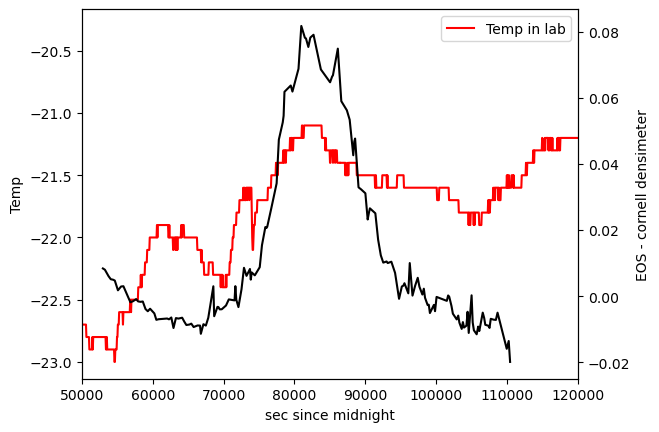

In [51]:

fig, ax1 = plt.subplots()
ax1.plot(cali_day1['secs_sm'],-cali_day1['Temp'],  '-r')
ax1.plot(cali_day2['secs_sm']+24*60*60,-cali_day2['Temp'],  '-r', label='Temp in lab')

ax2 = ax1.twinx()
ax2.plot(df2['sec since midnight'],
         df2['Density']-cd['Preferred D'], '-k', label='Berkeley PT - Cornell Raman')
ax2.set_xlim([50000, 120000])



ax1.legend()
ax1.set_ylabel('Temp')
ax1.set_xlabel('sec since midnight')

ax2.set_ylabel('EOS - cornell densimeter')
ax2.set_xlabel('sec since midnight')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 0, 'sec since midnight')

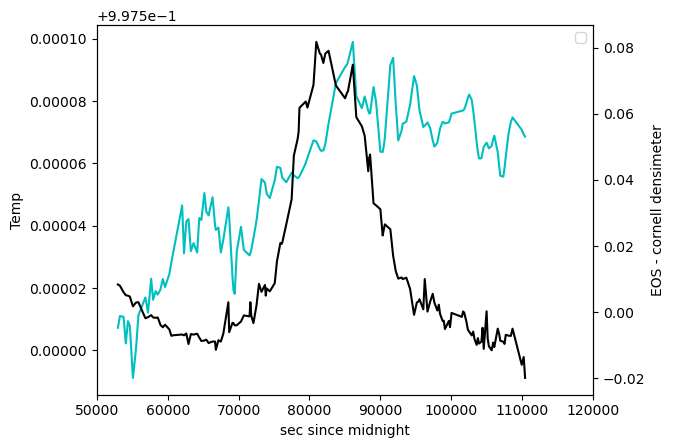

In [50]:



fig, ax1 = plt.subplots()
ax1.plot(df2['sec since midnight'],
         df2['Ne_Correction'],
         '-c')
ax2 = ax1.twinx()
ax2.plot(df2['sec since midnight'],
         df2['Density']-cd['Preferred D'], '-k', label='Berkeley PT - Cornell Raman')
ax2.set_xlim([50000, 120000])



ax1.legend()
ax1.set_ylabel('Temp')
ax1.set_xlabel('sec since midnight')

ax2.set_ylabel('EOS - cornell densimeter')
ax2.set_xlabel('sec since midnight')